In [3]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
from dataloader import *
import torch.utils.data as data

# Test loading in of data

In [2]:
train_data = pd.read_csv('train_Tiny_ImageNet.csv')

In [3]:
val_data = pd.read_csv('val_Tiny_ImageNet.csv')

In [4]:
test_data = pd.read_csv('test_Tiny_ImageNet.csv')

In [5]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

100000
10000
10000


# Test randomly sampling data

In [6]:
train_sample = train_data.sample(10, random_state=18)

# Test a single image

In [7]:
idx = 0
img_name = train_sample.iloc[idx, 0]
print(img_name)

/datasets/Tiny-ImageNet/tiny-imagenet-200/train/n03179701/images/n03179701_408.JPEG


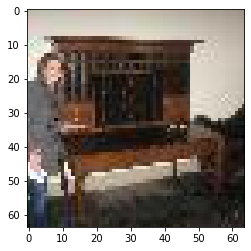

In [8]:
img_init = Image.open(img_name)
np_im = np.array(img_init)
plt.imshow(np_im)

In [9]:
gray_transforms = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                          transforms.ToTensor()])
im_tensor = gray_transforms(img_init)
im_tensor

tensor([[[0.7137, 0.7176, 0.7216,  ..., 0.5922, 0.5804, 0.5725],
         [0.7373, 0.7373, 0.7412,  ..., 0.6078, 0.5961, 0.5882],
         [0.7608, 0.7647, 0.7686,  ..., 0.6275, 0.6157, 0.6078],
         ...,
         [0.1412, 0.1686, 0.1294,  ..., 0.2039, 0.1176, 0.1725],
         [0.1176, 0.1647, 0.1294,  ..., 0.1020, 0.1373, 0.1490],
         [0.0588, 0.1412, 0.1176,  ..., 0.1294, 0.1686, 0.1216]]])

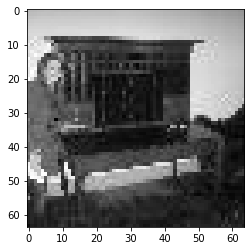

In [10]:
tensor2pil = transforms.ToPILImage()
im_to_show = tensor2pil(im_tensor)
plt.imshow(im_to_show, cmap = 'gray')

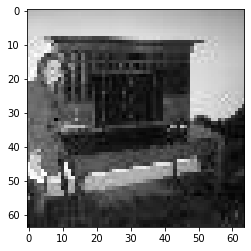

In [11]:
pil2tensor = transforms.ToTensor()       
rgb_image = pil2tensor(img_init)
r_image, g_image, b_image = rgb_image[0], rgb_image[1], rgb_image[2]
grayscale_image = (0.4*r_image + 0.4*g_image + 0.2*b_image).div(3.0)
plt.imshow(grayscale_image.numpy(), cmap='gray')

In [12]:
grayscale_image

tensor([[0.2376, 0.2384, 0.2397,  ..., 0.1982, 0.1942, 0.1916],
        [0.2458, 0.2460, 0.2473,  ..., 0.2034, 0.1995, 0.1969],
        [0.2554, 0.2567, 0.2575,  ..., 0.2099, 0.2060, 0.2034],
        ...,
        [0.0450, 0.0554, 0.0455,  ..., 0.0693, 0.0397, 0.0580],
        [0.0371, 0.0554, 0.0442,  ..., 0.0345, 0.0463, 0.0502],
        [0.0186, 0.0473, 0.0403,  ..., 0.0437, 0.0573, 0.0416]])

# Test __get_item__

In [13]:
transform = [transforms.RandomCrop(64),
             transforms.RandomHorizontalFlip()]
transform

[RandomCrop(size=(64, 64), padding=None), RandomHorizontalFlip(p=0.5)]

In [14]:
rgb_image = Image.open(img_name)        
gray_image = Image.open(img_name)

In [15]:
if transform is not None:
    rgb_transform = transforms.Compose(transform)
    rgb_image = rgb_transform(rgb_image)
    
    gray_transform = transform
    gray_transform.append(transforms.Grayscale(num_output_channels=1))
    gray_transform = transforms.Compose(gray_transform)
    gray_image = gray_transform(gray_image)

else:
    gray_transform = transforms.Grayscale(num_output_channels=1)
    gray_image = gray_transform(gray_image)

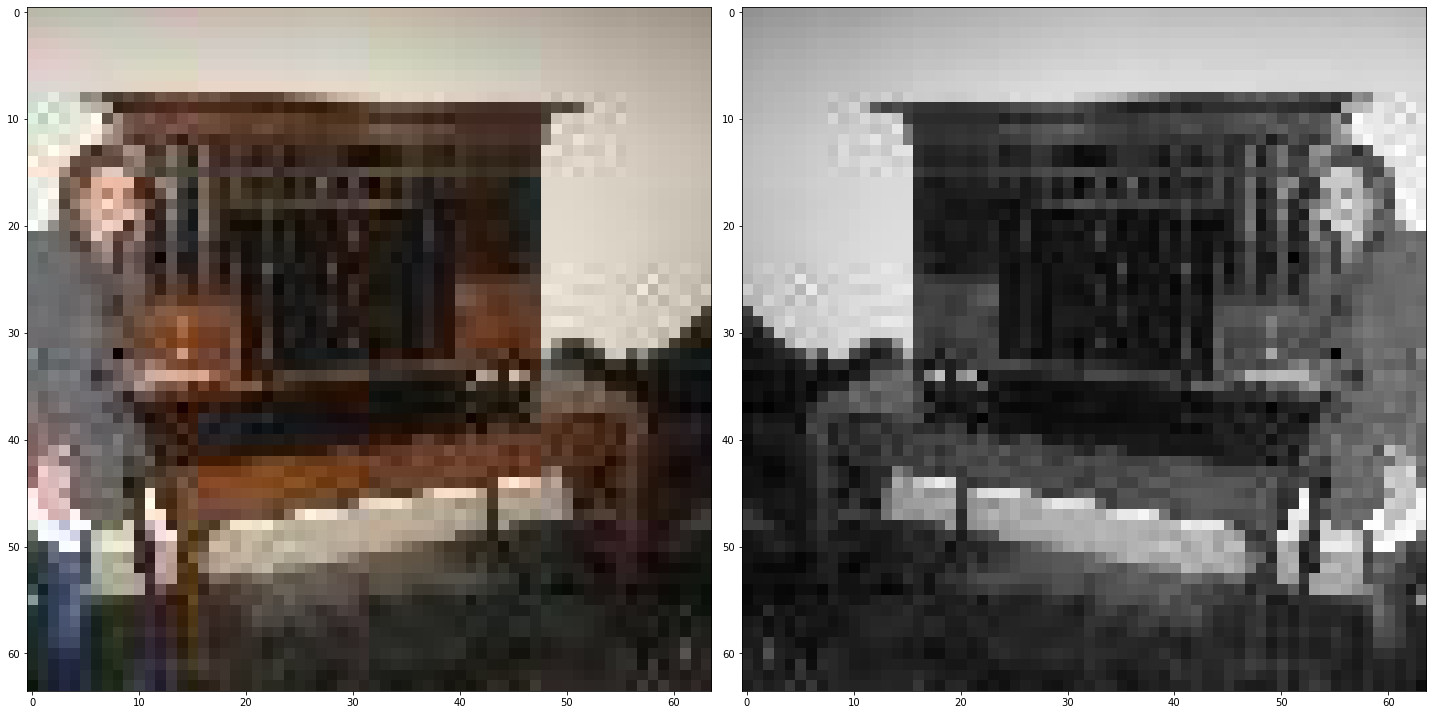

In [16]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))
ax[0].imshow(rgb_image)
ax[1].imshow(gray_image, cmap='gray')
plt.tight_layout()

In [17]:
pil2tensor = transforms.ToTensor()
rgb_tensor = pil2tensor(rgb_image)
gray_tensor = pil2tensor(gray_image)

# Test dataset class

In [1]:
train_csv = 'train_Tiny_ImageNet.csv'

In [4]:
transform = [transforms.RandomCrop(64),
             transforms.RandomHorizontalFlip()]

In [5]:
test_dataset = ImageDataset(train_csv, n_samples=10, random_seed=13, transform=transform)

In [6]:
test_dataset[0][1].size()

torch.Size([3, 64, 64])

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                          batch_size=2,
                          num_workers=4,
                          shuffle=True)

In [8]:
for i, (gray, rgb) in enumerate(train_loader):
    print('Grayscale size:', gray.size())
    print('RGB size:', rgb.size())

Grayscale size: torch.Size([2, 1, 64, 64])
RGB size: torch.Size([2, 1, 64, 64])
Grayscale size: torch.Size([2, 1, 64, 64])
RGB size: torch.Size([2, 1, 64, 64])
Grayscale size: torch.Size([2, 1, 64, 64])
RGB size: torch.Size([2, 1, 64, 64])
Grayscale size: torch.Size([2, 1, 64, 64])
RGB size: torch.Size([2, 1, 64, 64])
Grayscale size: torch.Size([2, 1, 64, 64])
RGB size: torch.Size([2, 1, 64, 64])
